# Problem Statement and Business Goal

**Problem Statement**

BoomBikes, a US-based bike-sharing provider, has experienced significant revenue declines due to the COVID-19 pandemic. To recover and thrive post-lockdown, the company aims to understand the factors influencing the demand for shared bikes. This knowledge will help them prepare for increased demand and outperform competitors.

**Business Goal**

The objective is to model the demand for shared bikes using available independent variables. This model will help BoomBikes’ management understand how demand varies with different features, enabling them to adjust their business strategy to meet customer expectations and optimize revenue. Additionally, the model will provide insights into the demand dynamics of new markets.

**The company wants to know:**

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

# Bikesharing Dataset and Data dictionary

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Bike Sharing dataset [here](https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv) and Data dictionary [here](https://drive.google.com/file/d/1x4Vi_FF0DEmTN1Cf6BnPHUuQP9p0s0Pz/view?usp=sharing).

# Initial Housekeeping

## Importing required Libraries

In [319]:
# Turn off warnings

import warnings
warnings.filterwarnings('ignore')

In [320]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.figure_factory as ff
import scipy.stats as stats
from sklearn.model_selection import cross_val_score, KFold

In [321]:
# set pandas option to display all columns

pd.set_option('display.max_columns', None)

# Using Linear Regression to Model Bike Demand

**Introduction**

To achieve BoomBikes’ business goal of understanding the demand for shared bikes, we will use linear regression. This statistical method will help us identify which variables significantly predict bike demand and how well these variables describe the demand.

Linear regression is a method to model the relationship between a dependent variable (target) and one or more independent variables (predictors). The goal is to find the best-fitting line through the data points that predicts the target variable.

The linear regression model can be represented by the equation:
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$
where:

* $ y $ is the dependent variable (bike demand).
* $ \beta_0 $ is the intercept.
* $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for the independent variables $ x_1, x_2, \ldots, x_n $.
* $ \epsilon $ is the error term.

**Modeling the Data**

Identify Significant Variables: By fitting the linear regression model, we can determine which variables have significant coefficients. These variables are crucial in predicting bike demand.
Evaluate Model Performance: We will use metrics such as R-squared and p-values to assess how well the model explains the variability in bike demand. R-squared indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

**Conclusion**

By using linear regression, we can gain insights into the factors affecting bike demand and how well these factors describe the demand. This understanding will enable BoomBikes to adjust their business strategy to meet customer needs and optimize revenue.

# Reading and Understanding the data

The below code can be used to read input file from a local folder.

In [322]:
# Read data locally
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


The below code will read data from file in Amazon S3.

In [323]:
# URL of the CSV file
#url = "https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv"

# Read the CSV file from the URL
#try:
#    df = pd.read_csv(url)
#except Exception as e:
#    print(f"An error occurred: {e}")

## Data Dictionary

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [324]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Fix dataype for `dteday`

Data type for `dteday` is object, change to date.

In [326]:
# fix dteday datatype
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

Make a copy of the original df.
This will be used later when the origial data needs to be used.

In [327]:
df_original = df.copy()

In [328]:
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


Let us look at the value counts in each variable.

In [329]:
# Create a new DataFrame with column names and unique value counts
unique_counts_df = pd.DataFrame({'Column Name': df.columns, 'Unique Value Count': [df[col].nunique() for col in df.columns]})

print(unique_counts_df)


   Column Name  Unique Value Count
0      instant                 730
1       dteday                 730
2       season                   4
3           yr                   2
4         mnth                  12
5      holiday                   2
6      weekday                   7
7   workingday                   2
8   weathersit                   3
9         temp                 498
10       atemp                 689
11         hum                 594
12   windspeed                 649
13      casual                 605
14  registered                 678
15         cnt                 695


# Dropping Columns not useful for analysis

## Drop `instant`

`instant` is a record index and can be dropped

In [330]:
# Drop instant
df = df.drop('instant', axis=1)

## Analyse and drop `casual` and `registered`

Confirm if `registered` + `casual` is equal to `cnt`

In [331]:
(df['cnt'] - df['registered'] - df['casual']).sum()

0

`casual` and `registered` are confirmed to be a split of `cnt`, these features will not contribute to our analysis, hence dropping them.

In [332]:
# Drop casual
df = df.drop('casual', axis=1)

# Drop registered
df = df.drop('registered', axis=1)

# Univariate Analysis

## Categorical Variables

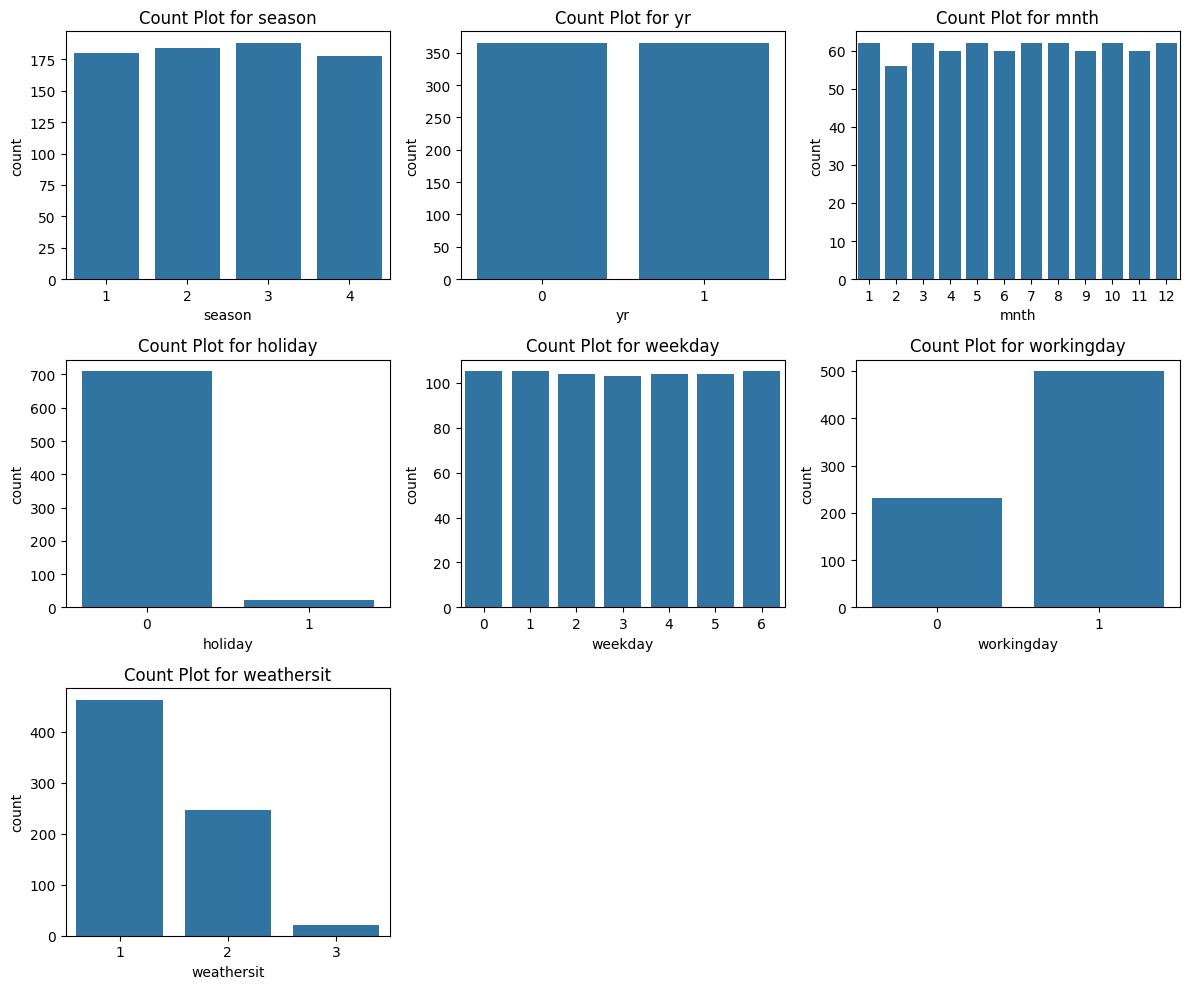

In [333]:
# List of categorical columns to create count plots
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Create a grid of subplots to hold count plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier iteration

# Loop through each categorical column and create a count plot
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i]) # Generate count plot for the current column
    axes[i].set_title(f'Count Plot for {column}') # Set title for each plot based on the column name

# Remove unused subplot axes to avoid blank spaces
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Inference:**

**Season:**
The distribution across the four seasons (1-4) is almost uniform, with each season having approximately the same number of data points.
There is no significant imbalance between seasons, indicating consistent data collection throughout the year.

**Year (yr):**
The data is collected over two years, as indicated by yr = 0 and yr = 1. The count for both years is equal, suggesting balanced data between the two years.

**Month (mnth):**
The count of data points across the 12 months is quite even, with a slight dip in the first month (January).
This indicates that data is consistently available throughout the year.

**Holiday:**
A significant majority of the data points are for non-holidays (holiday = 0), with only a few data points collected on holidays (holiday = 1).
This makes sense since there are more working days in an year than holidays.

**Weekday:**
The counts across all days of the week (0-6) are almost identical, indicating that the data is evenly distributed over the days of the week.
This uniformity suggests no day-of-week bias in data.

**Working Day:**
There are more data points for working days (workingday = 1) than non-working days (workingday = 0).
This makes sense, since there are more working days in a year than non-working days

**Weather Situation (weathersit):**
Most data points fall under weathersit = 1, indicating clear or good weather conditions.
Fewer data points are observed for moderate weather (weathersit = 2), and  severe weather conditions (weathersit = 3).
There are no datapoints observed for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (weathersit = 4).

**Summary:**
The data distribution appears balanced across most categorical variables such as season, year, month, and weekday.

## Numeric Variables

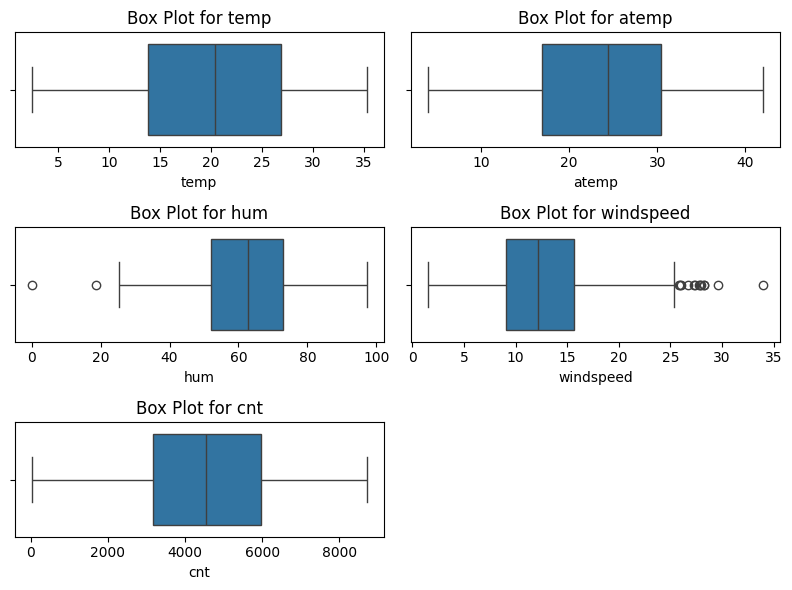

In [334]:
# List of numerical columns to create box plots for
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Create a grid of subplots to hold box plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier iteration

# Loop through each numerical column and create a box plot
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=column, data=df, ax=axes[i]) # Generate box plot for the current column
    axes[i].set_title(f'Box Plot for {column}') # Set title for each plot based on the column name

# Remove unused subplot axes to avoid blank spaces
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Inference:**

**Temperature (temp):**
The temperature data is relatively symmetric, with the interquartile range (IQR) falling between approximately 13 and 27.
The minimum value is around 0, and the maximum value is just below 35, suggesting a moderate range of temperatures without extreme outliers.

**Feels-like Temperature (atemp):**
The distribution of the "feels-like" temperature is similar to the actual temperature, with the IQR falling between 17 and 32.
The minimum value is around 5, and the maximum is close to 43, indicating a broader spread compared to the actual temperature.
There are no visible outliers in this variable.

**Humidity (hum):**
Humidity is somewhat right-skewed, with most values clustered around the 60–80 range, and a few lower values creating the left tail.
The IQR lies between approximately 50 and 75, with a couple of outliers on the lower side, around 0, indicating some observations with very low humidity.

**Windspeed:**
Windspeed shows a moderate right skew, with most values concentrated between 10 and 20, and a few outliers present beyond 25.
The IQR ranges between around 10 and 20, and outliers above 25 suggest some days with unusually high windspeed.

**Summary:**
The distributions for temp and atemp are relatively symmetric, showing no significant outliers.
hum and windspeed both show a slight right skew, with outliers on the lower end for humidity and higher end for windspeed.

### Remove outliers in `humidity` and `windspeed`

We will be using Min-Max scaling and Linear Regression to model the data.

**Impact of Outliers on Min-Max Scaling**
Min-max scaling transforms data to a fixed range, usually between 0 and 1. Outliers can have a significant impact on this process because the scaling depends on the minimum and maximum values in the data. If an outlier is present, it will stretch the scale, causing most of the non-outlier data to be compressed towards one end of the range. This compression can obscure patterns in the data and make the model less effective.

**Impact of Outliers on Linear Regression**
Linear regression models are highly sensitive to outliers because they rely on minimizing the sum of squared errors (SSE). Outliers can disproportionately affect the slope and intercept of the regression line, leading to poor model performance and predictions. A few extreme values can shift the regression line, making it unrepresentative of the general trend in the data.

In both cases, detecting and handling outliers is critical to ensure accurate scaling and reliable model performance.

**`hunidity` and `windspeed` contain outliers. Remove outliers.**

In [335]:
# Calculate the Interquartile Range (IQR) for 'hum' (humidity)
Q1_hum = df['hum'].quantile(0.25)
Q3_hum = df['hum'].quantile(0.75)
IQR_hum = Q3_hum - Q1_hum

# Calculate the IQR for 'windspeed'
Q1_windspeed = df['windspeed'].quantile(0.25)
Q3_windspeed = df['windspeed'].quantile(0.75)
IQR_windspeed = Q3_windspeed - Q1_windspeed

# Define the lower and upper bounds for detecting outliers in 'hum'
lower_bound_hum = Q1_hum - 1.5 * IQR_hum
upper_bound_hum = Q3_hum + 1.5 * IQR_hum

# Define the lower and upper bounds for detecting outliers in 'windspeed'
lower_bound_windspeed = Q1_windspeed - 1.5 * IQR_windspeed
upper_bound_windspeed = Q3_windspeed + 1.5 * IQR_windspeed

# Remove rows with outliers in 'hum' and 'windspeed'
df_no_outliers = df[
    (df['hum'] >= lower_bound_hum) & (df['hum'] <= upper_bound_hum) &
    (df['windspeed'] >= lower_bound_windspeed) & (df['windspeed'] <= upper_bound_windspeed)
]

# Print the shape of the original DataFrame and the DataFrame without outliers
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

df = df_no_outliers


Original DataFrame shape: (730, 13)
DataFrame shape after removing outliers: (716, 13)


# Bivariate analysis

## Categorical Variables

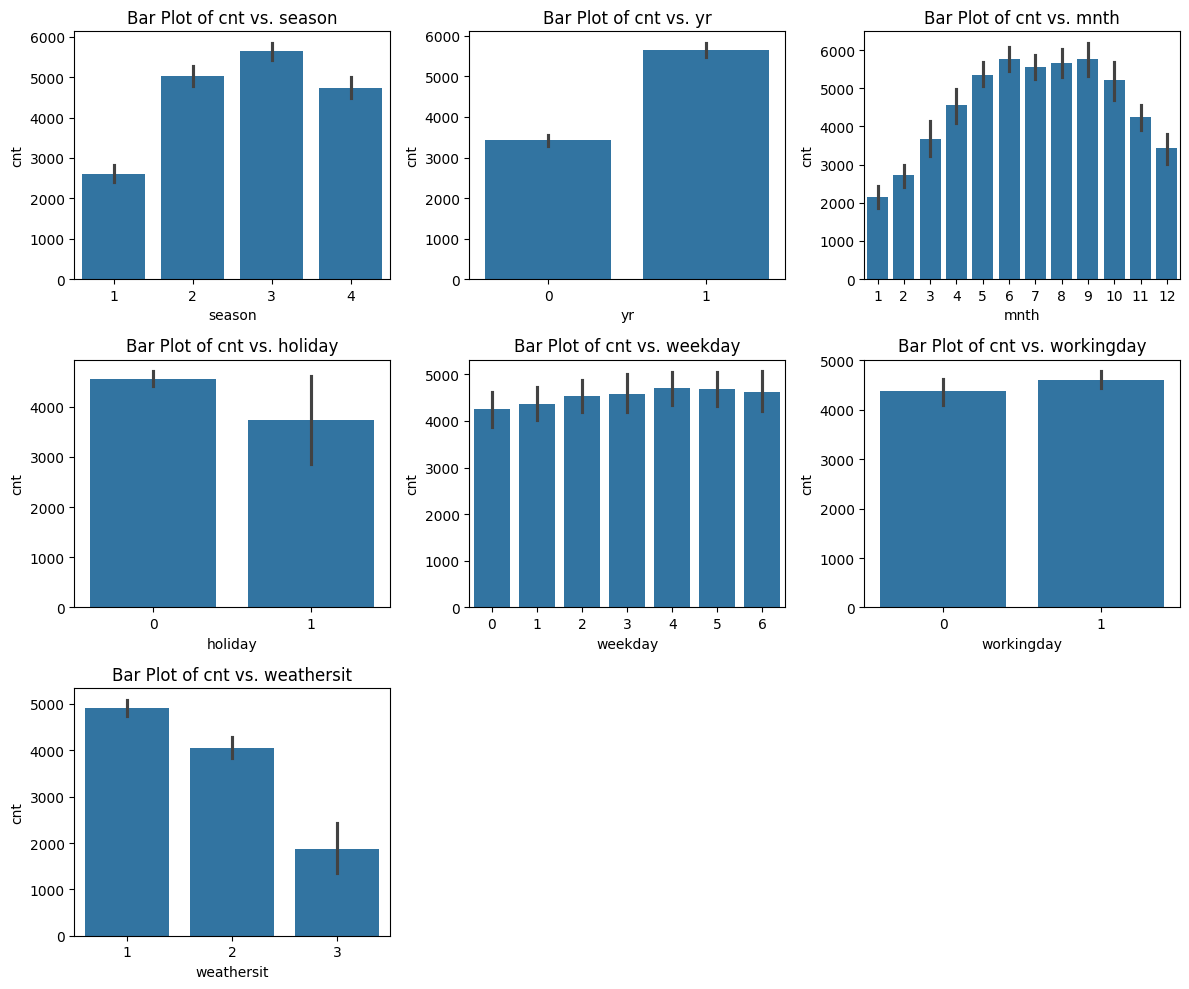

In [336]:
# List of categorical columns to analyze against the target variable 'cnt'
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Bivariate analysis of categorical columns against target 'cnt'
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

# Loop through each categorical column to plot its relationship with the target variable 'cnt'
for i, column in enumerate(categorical_columns):
    sns.barplot(x=column, y='cnt', data=df, ax=axes[i])
    axes[i].set_title(f'Bar Plot of cnt vs. {column}')

# Remove unused subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Inference:**

**season:**

The count of rentals varies across seasons. Season 3 (fall) seems to have the highest count, while season 1 (spring) has the lowest. This suggests that the season significantly affects the count.

**yr:** The count of rentals is higher in year 1 (2019). This indicates that the count has increased over time.

**mnth:** There is a clear seasonal trend, with the count peaking around months 6 to 9 (likely the summer months) and dropping in months 1 and 12 (likely winter months). This confirms a strong seasonal pattern in the data.

**holiday:** The count is slightly lower on holidays (1) compared to non-holidays (0), suggesting that fewer people use the service on holidays.

**weekday:** The count is fairly consistent across all weekdays (0-6). This suggests that the day of the week does not significantly affect the count, possibly due to similar demand throughout the week.

**workingday:** There is little difference in the count between working days (1) and non-working days (0). This might indicate that users rent similarly whether it’s a working day or not, or the difference is negligible.

**weathersit:** The count decreases as the weather situation worsens. Category 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) has the highest count, and category 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) has the lowest count. This suggests that weather significantly impacts the count, with fewer people engaging in the activity during poor weather conditions.

In summary, the count variable is influenced significantly by seasonal factors, year, and weather; while holidays, weekdays, and working days have less impact.

## Numeric Variables

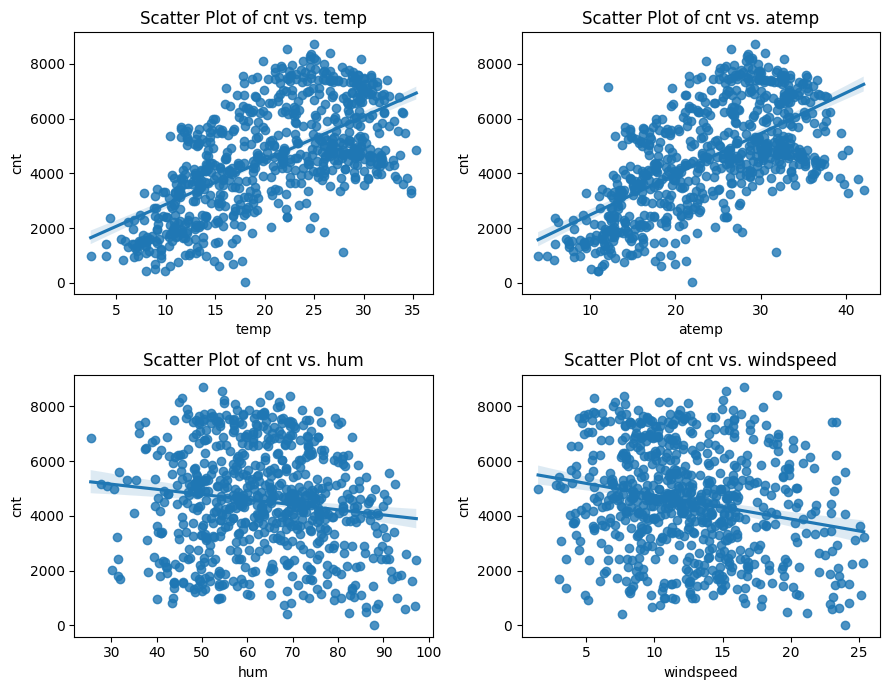

In [337]:
# List of numerical columns to analyze against the target variable 'cnt'
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
axes = axes.flatten()

# Loop through each numerical column to plot its relationship with the target variable 'cnt'
for i, column in enumerate(numerical_columns):
    sns.regplot(x=column, y='cnt', data=df, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of cnt vs. {column}')

# Remove unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**temp (Temperature):** There is a positive correlation between temperature and the count. As the temperature increases, the count also tends to increase. This suggests that more users are active when the weather is warmer.


**atemp (Apparent Temperature):** There is also a positive correlation between apparent temperature and the count, similar to the actual temperature. The trend shows that higher perceived temperatures are associated with higher counts, indicating that warmer weather encourages more activity.


**hum (Humidity):** There appears to be a slight negative correlation between humidity and the count. As humidity increases, the count tends to decrease. This suggests that higher humidity may deter people from outdoor activities, leading to fewer counts.


**windspeed:** There is a weak negative correlation between windspeed and the count. Higher windspeed seems to slightly reduce the count, implying that strong winds may discourage users from renting or engaging in outdoor activities.


**Overall Summary:**
The count seems to be positively influenced by temperature (both actual and apparent), meaning warmer conditions encourage more participation.
Humidity and windspeed have negative effects on the count, but these relationships are not as strong as temperature's positive effect.

Visualization of Relationship of Numerical Features against cnt

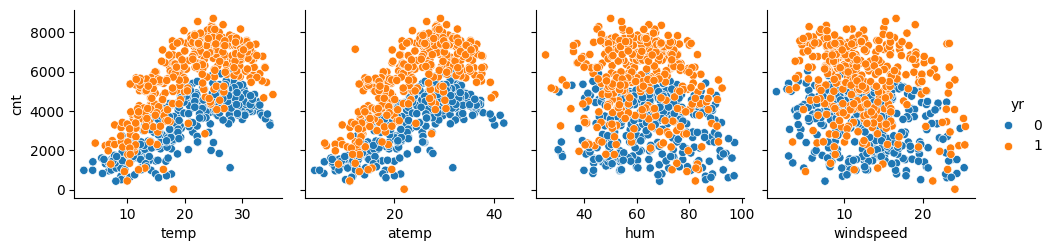

In [338]:
# Pair plot for numerical features against 'cnt' with 'yr' as hue
sns.pairplot(df, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'], hue='yr')
plt.show()

# Correlation

Let us now evaluate corelation between variables.

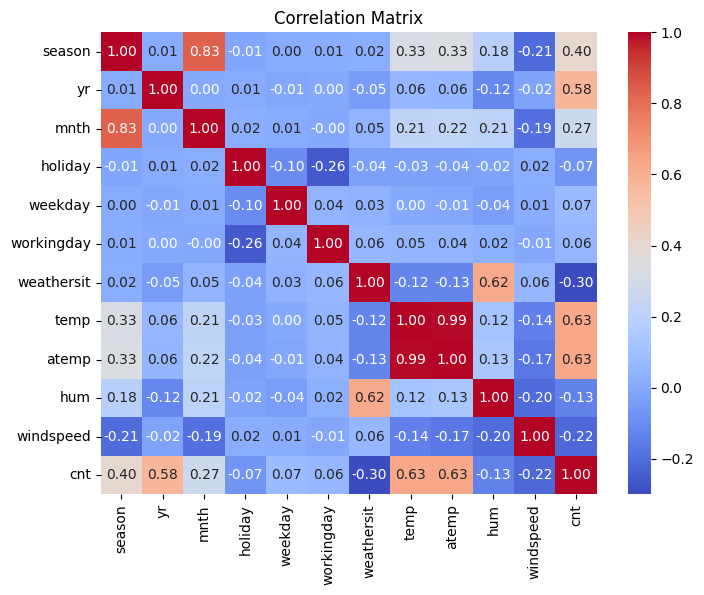

In [339]:
# Calculate the correlation matrix for all columns except 'dteday'
correlation_matrix = df.loc[:, df.columns != 'dteday'].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

**Key observations:**

cnt (count) has:

* Strong positive correlation with temp (0.63) and atemp (0.63), indicating higher counts with higher temperatures.
* Moderate positive correlation with yr (0.58), showing increased counts in the second year.
* Negative correlation with weathersit (-0.30), meaning worse weather reduces counts.
* Weak negative correlation with windspeed (-0.22) and hum (-0.13).
* temp and atemp are highly correlated (0.99), as expected due to their close relationship.
* season and mnth are highly correlated (0.83), suggesting overlap.

Other variables show weak or insignificant correlations with cnt.

### Drop `atemp`

`temp` and `atemp` are highly corelated. Dropping `atemp` since this is already calcualted using other variables in the dataset such as `humidity`.

> Refer below links for more details on how feels like temprature is calculated.

> https://en.wikipedia.org/wiki/Apparent_temperature

> https://en.wikipedia.org/wiki/Heat_index




In [340]:
df = df.drop('atemp', axis=1)

# Derived Variables

## Months since start

Create new derived variable for number of months since start. This will help us identify trends with passage of time.

In [341]:
# Calculate months since the start date
df['months_since_start'] = ((df['dteday'].dt.year - df['dteday'].dt.year.min()) * 12 + (df['dteday'].dt.month - df['dteday'].dt.month.min()))

# Display the DataFrame with the new column
df.head()


df = df.drop('dteday', axis=1)

# Preapare data

## Create Dummies

**Creating Dummy Variables in Linear Regression**

Dummy variables, also known as indicator variables, are used in linear regression to represent categorical data. These variables take on values of 0 or 1 to indicate the presence or absence of a categorical feature. This allows the regression model to include categorical data as predictors.

Directly including these categorical variables in a regression model can lead to incorrect interpretations. Dummy variables solve this problem by converting categorical data into a numerical format that the model can process.

**Drop First**

When creating dummy variables, we will drop one category to avoid multicollinearity, a situation where predictor variables are highly correlated. This dropped category serves as the reference group.

### Create dummies for `month`

In [342]:
# Create a dictionary to map month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Create dummy variables for the 'season' column using the mapping
month_dummies = pd.get_dummies(df['mnth'].map(month_mapping), prefix='mnth', dtype=np.int64, drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, month_dummies], axis=1)

df = df.drop('mnth', axis=1)

df.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,months_since_start,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,1,0,0,6,0,2,14.110847,80.5833,10.749882,985,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,1,0,0,0,0,0,0,0


### Create dummies for `weekday`

In [343]:
# Create a dictionary to map weekday numbers to weekday names
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

# Create dummy variables for the 'weekday' column using the mapping
weekday_dummies = pd.get_dummies(df['weekday'].map(weekday_mapping), prefix='weekday', dtype=np.int64, drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, weekday_dummies], axis=1)

df = df.drop('weekday', axis=1)

df.head()


,season,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,months_since_start,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,0,0,2,14.110847,80.5833,10.749882,985,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Create dummies for `season`

In [344]:
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Create dummy variables for the 'season' column using the mapping
season_dummies = pd.get_dummies(df['season'].map(season_mapping), prefix='season', dtype=np.int64, drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, season_dummies], axis=1)

df = df.drop('season', axis=1)

df.head()


,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,months_since_start,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_spring,season_summer,season_winter
0,0,0,0,2,14.110847,80.5833,10.749882,985,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


### Create dummies for `weather`

In [345]:
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow',
    4: 'Heavy Rain'
}

# Create dummy variables for the 'weathersit' column using the mapping
weather_dummies = pd.get_dummies(df['weathersit'].map(weather_mapping), prefix='weather', dtype=np.int64, drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, weather_dummies], axis=1)

df = df.drop('weathersit', axis=1)

df.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,months_since_start,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_spring,season_summer,season_winter,weather_Light Snow,weather_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


### Check for correlation after creating dummies

Check corelation after derived features have been created.

*We are using plotly here since we have a large number of variables now, and interactive features in plotly can be used to get details in any given cell by hovering above it.*

In [346]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Plotly
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=np.around(correlation_matrix.values, decimals=2),
    colorscale='Viridis'
)

fig.update_layout(
    title='Correlation Matrix',
    width=1400,
    height=1000,
)

fig.show()

**Explanation of Collinearity and Dropping Variables:**

Variables `months_since_start` and `yr` are highly collinear (0.87).
Variables

All the paris of variables above are capturing the same information, one of these variables can be dropped before performing linear regression to avoid multicollinearity issues. This simplifies the model and reduces redundancy without losing explanatory power.

We will drop `months_since_start`,

### Drop `months_since_start`

In [347]:
df = df.drop('months_since_start', axis=1)

# Create Train and Test data

In [348]:
# Define features (X) and target (y)
X = df.drop('cnt', axis=1)
y = df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (572, 28)
X_test shape: (144, 28)
y_train shape: (572,)
y_test shape: (144,)


# Scale Variables

**Min-max scaling**, also known as normalization, is a technique used to rescale the features of your data to a fixed range, typically [0, 1]. This is particularly useful in linear regression and other machine learning algorithms that are sensitive to the scale of the input data.

Linear regression models the relationship between input features and the target variable by fitting a linear equation to observed data. If the input features have different scales, the model might assign undue importance to features with larger scales, leading to biased results. Min-max scaling helps mitigate this issue by ensuring all features contribute equally to the model.

The formula for min-max scaling is:
$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

**Benefits in Linear Regression**

  * Improved Model Performance: By scaling the features, the linear regression model can converge faster during training and achieve better performance.

  * Equal Contribution: Ensures that all features contribute equally to the model, preventing features with larger scales from dominating the learning process.

  * Stability: Helps in stabilizing the numerical computations involved in the optimization process, reducing the risk of numerical instability.


In [349]:
# Min_max scale hum, windspeed and temp

scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp']
X_train[scaler_var] = scaler.fit_transform(X_train[scaler_var])

X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_spring,season_summer,season_winter,weather_Light Snow,weather_Mist
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.00000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,0.508741,0.029720,0.664336,0.552183,0.519969,0.461276,0.082168,0.078671,0.069930,0.085664,0.096154,0.08042,0.075175,0.089161,0.087413,0.087413,0.082168,0.141608,0.152098,0.153846,0.146853,0.131119,0.136364,0.234266,0.253497,0.244755,0.026224,0.321678
std,0.500361,0.169963,0.472636,0.228240,0.189825,0.204564,0.274861,0.269461,0.255252,0.280113,0.295060,0.27218,0.263904,0.285225,0.282686,0.282686,0.274861,0.348953,0.359430,0.361117,0.354269,0.337826,0.343475,0.423910,0.435393,0.430318,0.159940,0.467529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353871,0.372244,0.312955,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.565959,0.515661,0.436209,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746117,0.661398,0.585878,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Define Class to build and analyse Linear Models

Define Class to build linear regression model using statsmodels OLS, print model summary and then calulate VIF and print

The **ModelData** class is designed to manage multiple linear regression models, providing functionality to fit models, calculate relevant statistics, and summarize the results.

**Attributes**
1. models: A list that stores details of each fitted model.
2. model_number: An integer counter to keep track of the number of models fitted.

**Methods**

1. __ init __:
  * Initializes the ModelData class with an empty list for models and sets the model counter to zero.
2. fit_summary(self, X, y, features, comment):
  * Fits a linear regression model using the specified features (X) and target variable (y).
  * Adds a constant term to the features using sm.add_constant(X).
  * Fits the model using statsmodels’ OLS method and stores the summary.
  * Calculates the Variance Inflation Factor (VIF) for each feature to check for multicollinearity.
  * Appends the model details, including VIF data, R-squared values, F-statistic, and features, to the models list.
  * Increments the model counter.
  * Prints the model summary and VIF data.
3. all_summary(self):
  * Prints a summary of all fitted models, including model number, comment, R-squared, adjusted R-squared, F-statistic, probability of F-statistic, maximum VIF (excluding the constant), and features.

This class provides a structured way to manage and analyze multiple linear regression models, making it easier to compare and interpret the results.

In [350]:
class ModelData:
  """
  A class used to represent and manage multiple linear regression models.

  Attributes
  ----------
  models : list
      A list to store details of each fitted model.
  model_number : int
      A counter to keep track of the number of models fitted.

  Methods
  -------
  fit_summary(X, y, features, comment)
      Fits a linear regression model, calculates VIF, and stores the model summary.
  all_summary()
      Prints a summary of all fitted models.
  """

  def __init__(self):
    """
    Initializes the ModelData class with an empty list for models and a counter for model numbers.
    """
    self.models = []
    self.model_number = 0

  def fit_summary(self, X, y, features, comment):
    """
    Fits a linear regression model using the specified features and target variable,
    calculates the Variance Inflation Factor (VIF) for each feature, and stores the model summary.

    Parameters
    ----------
    X : DataFrame
        The input features for the regression model.
    y : Series
        The target variable for the regression model.
    features : list
        A list of feature names to be used in the model.
    comment : str
        A comment or description for the model.
    """
    X = X[features]
    # Add a constant.
    X = sm.add_constant(X)
    # create a fitted model in one line
    lm = sm.OLS(y,X).fit()
    lm_summary = lm.summary()

    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    # Append model and VIF data to the models list
    self.models.append({
        "model_number": "Model#" + str(self.model_number),
        "Comment": comment,
        "model": lm,
        "vif_data": vif_data,
        "R2": lm.rsquared,
        "Adj. R-squared": lm.rsquared_adj,
        "F-statistic": lm.fvalue,
        "Prob (F-statistic)": lm.f_pvalue,
        "Max VIC": vif_data.loc[vif_data['feature'] != 'const', 'VIF'].max(),
        #create string with all features as comma seperated
        "Features": ', '.join(features)
    })
    self.model_number = self.model_number + 1

    print(lm.summary())
    print('\n')
    print('================================')
    print(vif_data.sort_values(by='VIF'))
    print('================================')

  def all_summary(self):
    """
    Prints a summary of all fitted models, including model number, comment, R2, adjusted R2,
    F-statistic, probability of F-statistic, maximum VIF (excluding constant), and features.
    """
    print("Model Number  Comment                   R2                    Adj. R-squared        F-statistic           Prob (F-statistic)         Max VIC (ex. const)  ")
    print("============  ========================= ===================== ===================== ===================== ========================== =====================")


    for model in self.models:
        # Print model information in single lines
        print(f"{model['model_number']:<12}  {model['Comment']:<25} {model['R2']:<20}  {model['Adj. R-squared']:<20}  {model['F-statistic']:<20}  {model['Prob (F-statistic)']:<25}  {model['Max VIC']:<20}")

    ''' commented out - creates wide output since this includes all the feature names
    print("Model Number  Comment                   R2                    Adj. R-squared        F-statistic           Prob (F-statistic)         Max VIC (ex. const)   Features")
    print("============  ========================= ===================== ===================== ===================== ========================== ===================== ====================...")

    for model in self.models:
        # Print model information in single lines
        print(f"{model['model_number']:<12}  {model['Comment']:<25} {model['R2']:<20}  {model['Adj. R-squared']:<20}  {model['F-statistic']:<20}  {model['Prob (F-statistic)']:<25}  {model['Max VIC']:<20}  {model['Features']:<100}")
    '''

In [351]:
# Create an instance of the ModelData class
model_data = ModelData()

# Model#0 with all Features

We will first create a model with all the variables. This model will not be the most optimal one, nor will it have the most accurate coefficients, but we are building this model to get insights into what R2 score can be expected out of the data provided,

In [352]:
model_data.fit_summary(X=X_train, y=y_train, features=X.columns, comment='All Features')
model_data.all_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.7
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          8.28e-205
Time:                        09:31:03   Log-Likelihood:                -4595.2
No. Observations:                 572   AIC:                             9246.
Df Residuals:                     544   BIC:                             9368.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2291.9142    272

The model with all the features has a R2 score of 0.851 and Adjusted R2 of 0.843

# Feature Selection Using Recursive Feature Elimination (RFE)

Since we have a fairly large number of features, we will use an automated feature selection method called Recursive Feature Elimination (RFE) from the sklearn library. RFE helps in selecting the most significant features by recursively considering smaller sets of features and ranking them based on their importance.

**Model Training:** RFE starts by training a model (e.g., linear regression) on the entire set of features.

**Coefficient Calculation:** After training, each feature is assigned a coefficient $ \beta $. These coefficients represent the strength and direction of the relationship between the feature and the target variable.

**Feature Ranking:** The features are ranked based on the absolute values of their coefficients. Features with larger absolute coefficients are considered more important because they have a greater impact on the prediction.

**Feature Elimination:** The least important features are removed, and the model is re-trained on the remaining features.

**Iteration:** This process is repeated until the desired number of features is reached.



Let us look at how many features we have now

In [353]:
X_train.shape

(572, 28)

Let us now run RFE to identify the top 15 features

In [354]:
# Create a linear regression model
model = LinearRegression()

# Perform RFE
rfe = RFE(model, n_features_to_select=15)
rfe.fit(X_train, y_train)

# Load column names, rank, and support to a DataFrame
rfe_df = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe.ranking_,
    'Support': rfe.support_
})

rfe_df.sort_values(by='Rank')


,Feature,Rank,Support
0,yr,1,True
1,holiday,1,True
2,workingday,1,True
3,temp,1,True
4,hum,1,True
5,windspeed,1,True
25,season_winter,1,True
7,mnth_December,1,True
23,season_spring,1,True
19,weekday_Sunday,1,True


Let us look at the features selected in RFE.

In [355]:
X.columns[rfe.support_].values.tolist()

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'mnth_December',
 'mnth_July',
 'mnth_November',
 'mnth_September',
 'weekday_Saturday',
 'weekday_Sunday',
 'season_spring',
 'season_winter',
 'weather_Light Snow']

## Model#1 with RFE supported features

Building model with RFE supported features.

In [356]:
selected_features = X.columns[rfe.support_]    # Building model with RFE supported features.
model_data.fit_summary(X=X_train, y=y_train, features=selected_features, comment='RFE selected Fets')
model_data.all_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     205.2
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          3.61e-209
Time:                        09:31:04   Log-Likelihood:                -4619.1
No. Observations:                 572   AIC:                             9268.
Df Residuals:                     557   BIC:                             9333.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2236.3704    184

The R2 and Adj R2 in Model#0 are high, but the variance is also very high as evidenced by infinite VIFs. This points to coliearity between the independent variables.

# Manual Feature Selection

After using Recursive Feature Elimination (RFE) to identify a subset of important features, we will now apply a manual feature selection method to refine our model further.

This process involves starting with the two most important features and gradually adding more features or feature groups. At each step, we will evaluate the model’s performance and make adjustments as needed. Our goal is to achieve a model with strong statistical metrics and significant features.

**Steps for Manual Feature Selection**

* **Start with Key Features:** Begin with the two most important features identified by RFE.
* **Incremental Addition:** Gradually add more features or groups of features to the model.
* **Model Evaluation**: After each addition, evaluate the model using the following metrics:
  * R-squared (R²): Indicates the proportion of variance in the dependent variable explained by the independent variables.
  * Adjusted R-squared: Adjusts R² for the number of predictors in the model, providing a more accurate measure.
  * F-statistic and Prob (F-statistic): Assess the overall significance of the model.
  * P-values: Determine the significance of individual features.
 * Variance Inflation Factor (VIF): Measures multicollinearity among features. A VIF less than 2 is desirable.
* **Feature Adjustment:** Based on the evaluation, decide whether to add or remove features:
  * High p-value, High VIF: Definitely drop these features as they are neither significant nor independent.
  * High p-value, Low VIF: Remove these features first, then rebuild the model and recheck VIF.
  * Low p-value, High VIF: Consider removing these features later to address multicollinearity.
  * Low p-value, Low VIF: Retain these features as they are significant and independent.
* **Iteration:** Repeat the process until the model achieves:
  * High R² and Adjusted R² values.
  * Significant F-statistic and Prob (F-statistic) (<0.05).
  * All features with high significance (low p-values).
  * All VIFs less than 5.

By following this systematic approach, we can refine our model to ensure it is both accurate and interpretable, helping BoomBikes make informed business decisions based on reliable predictions of bike demand.



**Significance Level - We will use a p-value threshold of 0.05 to evaluate feature significance, corresponding to a 95% confidence level. This means we are 95% confident that the observed relationships are not due to random chance, aligning with the 3rd standard deviation in a normal distribution.**


**VIF - We will use VIF of 5 as the threshhold.**

**R-squared (R²)**
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates that the model perfectly explains the variance.

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$


**Adjusted R-squared (R²)**
Adjusted R-squared adjusts the R-squared value based on the number of predictors in the model. It accounts for the model complexity and only increases if the new term improves the model more than would be expected by chance.

$\bar{R}^2 = 1 - \left( \frac{1 - R^2}{n - k - 1} \right) (n - 1)$


**F-statistic**
The F-statistic is used to determine whether there is a significant relationship between the dependent variable and the independent variables in a regression model.

$F = \frac{(SS_{reg} / k)}{(SS_{res} / (n - k - 1))}$


**Prob (F-statistic)**
The probability of observing the F-statistic value under the null hypothesis that all regression coefficients are equal to zero. It tests the overall significance of the model.


**p-value**
The p-value for each coefficient tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

$t = \frac{\hat{\beta}}{SE(\hat{\beta})}$


**Variance Inflation Factor (VIF)**
VIF measures the amount of multicollinearity in a set of multiple regression variables. A VIF value greater than 5 indicates high multicollinearity.

$VIF_i = \frac{1}{1 - R_i^2}$

## Model#2 Add `temp` and `yr`

We will start with two most impactful features - `temp` and `yr`.

In [357]:
selected_features = ['temp', 'yr']
model_data.fit_summary(X=X_train, y=y_train, features=selected_features, comment='temp, yr')
model_data.all_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     604.2
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          1.82e-141
Time:                        09:31:04   Log-Likelihood:                -4813.1
No. Observations:                 572   AIC:                             9632.
Df Residuals:                     569   BIC:                             9645.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        730.8745    126.659      5.770      0.0

## Model#3 Add `hum` and `windspeed`

Adding `hum` and `windspeed`

In [358]:
selected_features = ['temp', 'yr',
                     'hum', 'windspeed'] # adding hum and windspeed
model_data.fit_summary(X=X_train, y=y_train, features=selected_features, comment='+ hum & windspeed')
model_data.all_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     366.9
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          9.91e-156
Time:                        09:31:04   Log-Likelihood:                -4773.4
No. Observations:                 572   AIC:                             9557.
Df Residuals:                     567   BIC:                             9579.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2332.0112    210.927     11.056      0.0

R2 improved, and VIF looks good. Keep both `hum` and `windspeed`

## Model#4 Add `holiday` and `workingday`

Adding `holiday` and `workingday`

In [359]:
selected_features = ['temp', 'yr',
                     'hum', 'windspeed',
                     'holiday', 'workingday'] # Adding holiday and workingday
model_data.fit_summary(X=X_train, y=y_train, features=selected_features, comment='+ holi & workday')
model_data.all_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     249.0
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          4.76e-155
Time:                        09:31:04   Log-Likelihood:                -4769.0
No. Observations:                 572   AIC:                             9552.
Df Residuals:                     565   BIC:                             9583.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2290.8150    217.567     10.529      0.0

p-value for `workingday` is more than 0.05.
Remove `workingday` due to insignifiance.

## Model#5 Remove `workingday` and add `weather` group

Remove `workingday` and add `weather` group - all the dummy features created from `weather` that were selected in RFE.

In [360]:
X.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_December', 'mnth_July', 'mnth_November', 'mnth_September',
       'weekday_Saturday', 'weekday_Sunday', 'season_spring', 'season_winter',
       'weather_Light Snow'],
      dtype='object')

In [361]:
selected_features = ['temp', 'yr',
                     'hum', 'windspeed',
                     'holiday',              # remove workingday
                     'weather_Light Snow']   # add weather group
model_data.fit_summary(X=X_train, y=y_train, features=selected_features, comment='- workday + weather group')
model_data.all_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     263.2
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          5.33e-160
Time:                        09:31:04   Log-Likelihood:                -4757.5
No. Observations:                 572   AIC:                             9529.
Df Residuals:                     565   BIC:                             9559.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2112.5123    212

Everything looks good.

## Model#6 add `season` group

Add `Season` group - all the dummy features created from `season` that were selected in RFE.

In [362]:
X.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_December', 'mnth_July', 'mnth_November', 'mnth_September',
       'weekday_Saturday', 'weekday_Sunday', 'season_spring', 'season_winter',
       'weather_Light Snow'],
      dtype='object')

In [363]:
selected_features = ['temp', 'yr',
                     'hum', 'windspeed',
                     'holiday',
                     'weather_Light Snow',
                     'season_spring', 'season_winter']   # add season group
model_data.fit_summary(X=X_train, y=y_train, features=selected_features, comment='+ season group')
model_data.all_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     297.5
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          1.25e-196
Time:                        09:31:04   Log-Likelihood:                -4665.8
No. Observations:                 572   AIC:                             9350.
Df Residuals:                     563   BIC:                             9389.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2782.6497    236

Everything looks good

## Model#7 Add `month` group

In [364]:
X.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_December', 'mnth_July', 'mnth_November', 'mnth_September',
       'weekday_Saturday', 'weekday_Sunday', 'season_spring', 'season_winter',
       'weather_Light Snow'],
      dtype='object')

In [365]:
selected_features = ['temp', 'yr',
                     'hum', 'windspeed',
                     'holiday',
                     'weather_Light Snow',
                     'season_spring', 'season_winter',
                     'mnth_December', 'mnth_July', 'mnth_November', 'mnth_September']    # add month group
model_data.fit_summary(X=X_train, y=y_train, features=selected_features, comment='+ month group')
model_data.all_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     231.8
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          5.71e-208
Time:                        09:31:04   Log-Likelihood:                -4627.5
No. Observations:                 572   AIC:                             9281.
Df Residuals:                     559   BIC:                             9338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2957.0529    228

Everything looks good

## Model#8 Add weekday group

Add weekdy group and run.

In [366]:
X.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_December', 'mnth_July', 'mnth_November', 'mnth_September',
       'weekday_Saturday', 'weekday_Sunday', 'season_spring', 'season_winter',
       'weather_Light Snow'],
      dtype='object')

In [367]:
selected_features = ['temp', 'yr',
                     'hum', 'windspeed',
                     'holiday',
                     'weather_Light Snow',
                     'season_spring', 'season_winter',
                     'mnth_December', 'mnth_July', 'mnth_November', 'mnth_September',
                     'weekday_Saturday', 'weekday_Sunday']    # add weekday group
model_data.fit_summary(X=X_train, y=y_train, features=selected_features, comment='+ weekday group')
model_data.all_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     205.2
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          3.61e-209
Time:                        09:31:04   Log-Likelihood:                -4619.1
No. Observations:                 572   AIC:                             9268.
Df Residuals:                     557   BIC:                             9333.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3030.1959    228

p-value for saturday ishigh. Remove saturday

## Model#9 Removing Saturday

Removding saturday and running

In [368]:
selected_features = ['temp', 'yr',
                     'hum', 'windspeed',
                     'holiday',
                     'weather_Light Snow',
                     'season_spring', 'season_winter',
                     'mnth_December', 'mnth_July', 'mnth_November', 'mnth_September',
                     'weekday_Sunday']   # remove saturday
model_data.fit_summary(X=X_train, y=y_train, features=selected_features, comment='- saturday')
model_data.all_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     221.1
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          2.87e-210
Time:                        09:31:04   Log-Likelihood:                -4619.3
No. Observations:                 572   AIC:                             9267.
Df Residuals:                     558   BIC:                             9327.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3048.0331    226

Everything looks good.

# Select Model

Let us look at the metrics for all the models we have trained till now.

In [369]:
# Print summary for all the models
model_data.all_summary()

Model Number  Comment                   R2                    Adj. R-squared        F-statistic           Prob (F-statistic)         Max VIC (ex. const)  
============  ========================= ===================== ===================== ===================== ========================== =====================
Model#0       All Features              0.8505518752380475    0.8431344131634654    114.66885394030902    8.275111180090749e-205     inf                 
Model#1       RFE selected Fets         0.8375668594068573    0.8334841592842289    205.1502276066379     3.605200483340616e-209     inf                 
Model#2       temp, yr                  0.6798857125074381    0.6787605304775872    604.245086101821      1.8167244531026583e-141    1.002780730875452   
Model#3       + hum & windspeed         0.721329240904141     0.7193633096230414    366.9147786797031     9.913276538253475e-156     1.0612731702183207  
Model#4       + holi & workday          0.7255874132580539    0.7226732972

For Model#9 we have:
* High R² and Adjusted R² values.
* Significant F-statistic and Prob (F-statistic).
* All features with high significance (low p-values).
* All VIFs less than 5.

Hence we are **selecting Model#9 as the final model**.

Features used in this model are:

Let us see how many features are selected

In [370]:
print(len(selected_features))

13


Let us know look at the selected features

In [371]:
print(selected_features)

['temp', 'yr', 'hum', 'windspeed', 'holiday', 'weather_Light Snow', 'season_spring', 'season_winter', 'mnth_December', 'mnth_July', 'mnth_November', 'mnth_September', 'weekday_Sunday']


# Evaluate Model on train data

## Evaluate model's generalization ability with Cross Validation

Now let’s perform cross-validation by dividing the test data into 10 different folds. We will train and evaluate the model using the features from Model #12. This approach will help in assessing the model’s performance more robustly by ensuring that each data point is used for both training and validation, thus providing a more reliable estimate of the model’s generalization ability.

In [372]:
# Create a linear regression model
model = LinearRegression()

# Define the number of folds for cross-validation
n_splits = 10

# Create a KFold cross-validation object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train[selected_features], y_train, cv=kf, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))
print("Standard Deviation of R-squared:", np.std(cv_scores))

Cross-Validation R-squared Scores: [0.78637908 0.84046721 0.74802446 0.83116526 0.80343266 0.89268374
 0.83348599 0.87664088 0.84309367 0.75944187]
Mean R-squared: 0.8214814824633774
Standard Deviation of R-squared: 0.04469959207198707


**Mean R-squared:** 0.82 indicates that, on average, the model explains 82% of the variance in the target variable.


**Standard Deviation:** 0.0446 suggests that the model’s performance is consistent across different folds, with only minor variations.



## Analyse Learing Curves

Learning Curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). This will help usunderstand if the model is under fitting or over fitting and if it is generalizing well.

> Refer Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition ISBN: 9781492032649 page 131



In [373]:
def plot_learning_curves(model, X, y):

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
  train_errors, val_errors = [], []

  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  # Plot the learning curves
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training Error")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Error")

  # Add a title and labels
  plt.title("Learning Curves", fontsize=14)
  plt.xlabel("Training Set Size", fontsize=12)
  plt.ylabel("Mean Squared Error (RMSE)", fontsize=12)

  # Add a legend
  plt.legend(loc="upper right", fontsize=10)

  # Add grid for better readability
  plt.grid(True)

  # Display the plot
  plt.show()

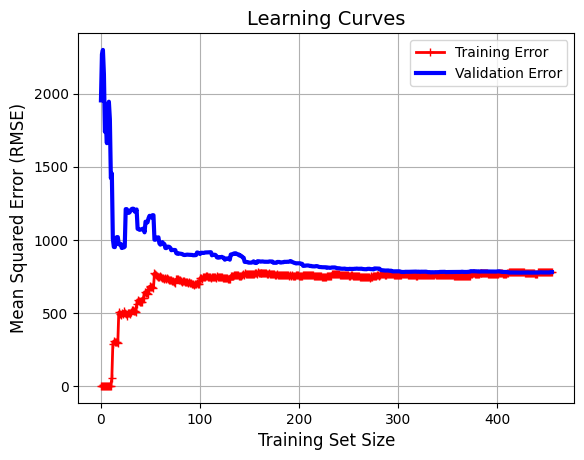

In [374]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_train[selected_features], y_train)

**1. Training Error (Red Line):**

At the very beginning (with a small training set), the training error is very low. This is expected because the model can overfit the small amount of data.
As the training set size increases, the training error gradually increases and stabilizes at a higher value. This suggests that the model is no longer overfitting and is capturing more general patterns from the data.


**2. Validation Error (Blue Line):**

Initially, the validation error is quite high. This is common when the model is trained on very little data, as it struggles to generalize to unseen data.
As the training set size increases, the validation error decreases rapidly, indicating that the model is learning and improving its performance.
Eventually, the validation error plateaus, indicating that the model has learned as much as it can given the available data.


**3. Convergence:**

The gap between the training and validation errors narrows as the training set size increases and they eventually converge.
The training error remains lower than the validation error.


**4. Model Behavior:**
The fact that both errors plateau suggests that the model’s performance is stable and that adding more data may not drastically reduce the error further.
The convergence of training and validation error indicates that the model is  generalising well, meaning the model performs well on on both training data and test data.


**Conclusion:**
The model appears to be learning well.

## Residual Analysis

Now we will use LinearRegression Class from sklearn to build and evaluate the model.

Note that we will use the selected features from Model#9.

**We will validate the assumptions of linear regression in the next steps. The assumptions are:**

* Errors are normally distributed
* Errors are independent of each other
* Homoscedasticity
* Linear Relationship



In [375]:
# Create a linear regression model
model = LinearRegression()

# Fit the model using the selected features
model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_train_pred = model.predict(X_train[selected_features])

# Evaluate the model
r2 = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

print(f"Train R-squared: {r2}")
print(f"Train Mean Squared Error (MSE): {mse}")
print(f"Train Root Mean Squared Error (RMSE): {rmse}")


Train R-squared: 0.8374561873848637
Train Mean Squared Error (MSE): 605256.8856503406
Train Root Mean Squared Error (RMSE): 777.9825741302568


### Check Normality of Residuals

<Figure size 800x600 with 0 Axes>

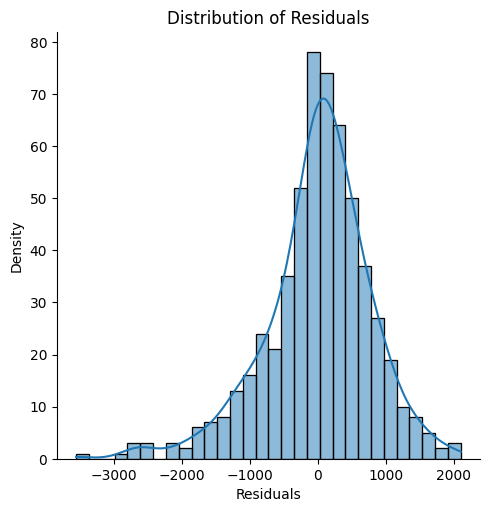

In [376]:
residuals = y_train - y_train_pred

# Create a distplot of residuals
plt.figure(figsize=(8, 6))
sns.displot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

**Analysis of the Residuals Distribution Plot:**

This plot assesses the normality assumption of the errors. A normal distribution is expected for the residuals.


**Observations:**

Shape: The histogram appears roughly bell-shaped, suggesting a normal distribution.

Symmetry: The distribution seems relatively symmetric around the mean (around 0).

Outliers: There are a few outliers, especially on the left tail. Outliers can indicate potential issues with the model or data points that might not fit the linear relationship well. But the amount of outliners here are within the acceptable range.

**Overall Assessment:**
The distribution is generally consistent with normality.

### Check Homoscedasticity of Residuals

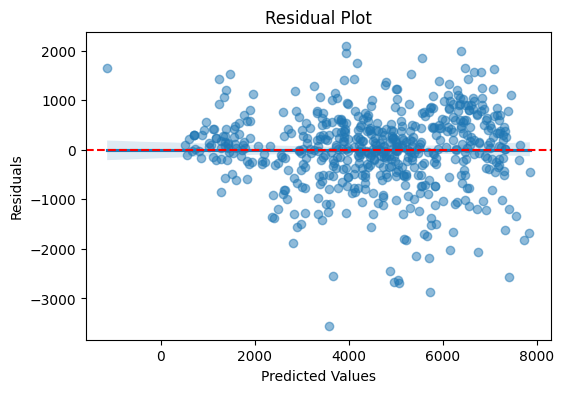

In [377]:
# Create a regplot of residuals vs. predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_train_pred, y=residuals, scatter_kws={'alpha': 0.5})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


**Analysis of the Residual Plot:**

This plot assesses the homoscedasticity assumption, which means the variance of the errors should be constant across different predicted values.

**Observations**:

Scatter: The residuals seem to be scattered randomly around the horizontal line at 0. This is a good sign as it suggests there's no clear pattern in the spread of the residuals.

Funnel Shape: There doesn't appear to be a funnel shape, where the residuals spread out more as the predicted values increase or decrease. This is another positive indication.

**Overall Assessment:**

The residual plot supports the homoscedasticity assumption and independent assumption. The residuals are evenly scattered, and there's no evidence of a changing variance based on the predicted values.

### Check Linear Relationship between y and y_pred

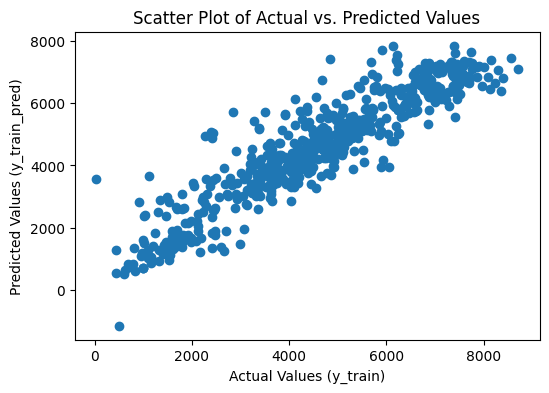

In [378]:
# Create scatter plot of actual values and predicted values on train data
plt.figure(figsize=(6, 4))
plt.scatter(y_train, y_train_pred)  # Scatter plot of y_train vs. y_test
plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_train_pred)")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

**Analysis of the Scatter Plot of Actual vs. Predicted Values:**

This plot assesses the linear relationship assumption. It should show a clear linear trend between the actual and predicted values.

**Observations:**

Linearity: There appears to be a strong linear relationship between the actual and predicted values. The points seem to cluster around a straight line.

Scatter: The scatter around the line is relatively uniform, indicating a consistent relationship.


**Overall Assessment:**

The scatter plot supports the linear relationship assumption. The points exhibit a clear linear pattern, suggesting that the model is capturing the underlying linear relationship in the data.

### Q-Q Plot of Residuals

Q-Q plot (quantile-quantile plot) is plot used to compare the distribution of a dataset with another distribution. It plots and compares quantiles of a dataset against a theoretical distribution. If both distributions are, the plotted points will align on a straight line along the diagonal.


Q-Q plots can be used to check for normality, identify outliers and model interpretation. For example if the Q-Q plot of residuals aligns along the diagonal, this indicates that the assumption of normality is reasonable. If there is deviations along the bottom or the top end of the diagonal, it would indicate outliers.

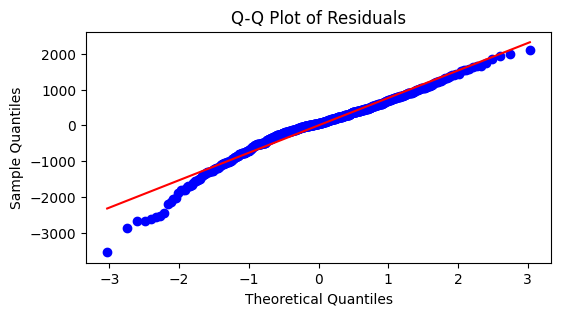

In [379]:
# Create a Q-Q plot
plt.figure(figsize=(6, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


**Analysis of the Q-Q Plot of Residuals:**

This plot is another way to assess the normality assumption of the errors. It compares the quantiles of the observed residuals to the quantiles of a theoretical normal distribution.

**Observations:**

Linearity: The points generally follow a straight line, suggesting that the residuals are normally distributed.

Deviations: There are some deviations from the line, particularly in the tails. These deviations indicate that the observed residuals might not perfectly align with the theoretical normal distribution.

**Overall Assessment:**

While the Q-Q plot shows a general linear trend, the deviations from the line, especially in the tails, suggest that the normality assumption might not be perfectly met. This could be due to outliers or other factors that are skewing the distribution. But the skewness show is within acceptable range.

**In Conclusion:**

Based on the analysis of all the plots, the linear regression assumptions seem to be generally met with some very minor deviations.

# Evaluate Model on test data

Now we will evaluate the model against test data.

In [380]:
# Rescale test data

scaler_var = ['hum', 'windspeed', 'temp']
X_test[scaler_var] = scaler.transform(X_test[scaler_var])

X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_spring,season_summer,season_winter,weather_Light Snow,weather_Mist
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.458333,0.027778,0.763889,0.523068,0.545183,0.458781,0.104167,0.111111,0.083333,0.083333,0.048611,0.097222,0.104167,0.076389,0.069444,0.069444,0.090278,0.145833,0.104167,0.104167,0.118056,0.194444,0.166667,0.256944,0.250000,0.250000,0.034722,0.409722
std,0.500000,0.164909,0.426174,0.230557,0.208035,0.191867,0.306543,0.315367,0.277350,0.277350,0.215804,0.297294,0.306543,0.266546,0.255096,0.255096,0.287580,0.354171,0.306543,0.306543,0.323800,0.397154,0.373979,0.438474,0.434524,0.434524,0.183714,0.493499
min,0.000000,0.000000,0.000000,0.094267,0.083527,0.086646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.317269,0.397187,0.320808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.489639,0.543504,0.452813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.729762,0.697506,0.578706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.250000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.965734,0.997100,0.942311,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [381]:
# Make predictions on the test set
y_test_pred = model.predict(X_test[selected_features])

# Evaluate the model
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"Test R-squared: {r2}")
print(f"Test Mean Squared Error (MSE): {mse}")
print(f"Test Root Mean Squared Error (RMSE): {rmse}")

Test R-squared: 0.8181645683390327
Test Mean Squared Error (MSE): 675432.1206155693
Test Root Mean Squared Error (RMSE): 821.8467744145312


## Mandated Model Evaluation step

In [382]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8181645683390327

# Evaluation Conclusion

Here are metrics from the train and test data:


Train R-squared: 0.8374561873848637

Train Mean Squared Error (MSE): 605256.8856503406

Train Root Mean Squared Error (RMSE): 777.9825741302568



Test R-squared: 0.8181645683390327

Test Mean Squared Error (MSE): 675432.1206155693

Test Root Mean Squared Error (RMSE): 821.8467744145312




**In conclusion**, the model demonstrates good predictive power on both the training and test data. The relatively high R-squared values and low error metrics suggest that the model is able to capture the underlying relationships in the data and make accurate predictions.

# Analyse Coefficients

Let us take a look at the scale factors used in the min-max scaler, the intercept and the coefficients.

In [383]:
# Print scale factors from min_max scaler
df_scaler = pd.DataFrame({'feature_names_in_': scaler.feature_names_in_, 'scale_': scaler.scale_})
print(df_scaler)

print('\n')

# Print intercept
print('Intercept: ', model.intercept_)

print('\n')
# Print coefficients from model
df_coef = pd.DataFrame({'feature_names_in_': model.feature_names_in_, 'coef_': model.coef_})
df_coef = df_coef.sort_values('coef_', ascending=False)
print(df_coef)

  feature_names_in_    scale_
0               hum  0.013921
1         windspeed  0.041959
2              temp  0.030391


Intercept:  3048.0331204439367


     feature_names_in_        coef_
0                 temp  4030.707759
1                   yr  1994.884044
7        season_winter   738.040142
11      mnth_September   534.569968
12      weekday_Sunday  -371.910736
8        mnth_December  -473.472832
10       mnth_November  -571.190693
4              holiday  -646.450330
9            mnth_July  -661.000747
3            windspeed  -970.033348
6        season_spring -1086.756781
5   weather_Light Snow -1588.002605
2                  hum -1855.874930


Print Linear Regression formula in easy redable form

In [384]:
# Print Linear Regression formula in easy redable form

formula_str = "cnt = " + model.intercept_.astype(str) + "\n"
for index, row in df_coef.iterrows():
  if row['coef_'] >= 0:
    formula_str += f"+ {row['coef_']:.6f} * {row['feature_names_in_']}"
    formula_str += "\n"
  else:
    formula_str += f"- {-row['coef_']:.6f} * {row['feature_names_in_']}"
    formula_str += "\n"

print(formula_str)

cnt = 3048.0331204439367
+ 4030.707759 * temp
+ 1994.884044 * yr
+ 738.040142 * season_winter
+ 534.569968 * mnth_September
- 371.910736 * weekday_Sunday
- 473.472832 * mnth_December
- 571.190693 * mnth_November
- 646.450330 * holiday
- 661.000747 * mnth_July
- 970.033348 * windspeed
- 1086.756781 * season_spring
- 1588.002605 * weather_Light Snow
- 1855.874930 * hum



# Interpretation of the Linear Regression Equation

The given linear regression equation models the demand for shared bikes `cnt` based on various independent variables. Here’s a detailed interpretation of each term in the equation focussing on:
1. Variables that are significant in predicting the demand for shared bikes
2. How well those variables describe the bike demands

*Note that temp and windspeed are min-max scaled.*

## Interpretation of the Linear Model

This linear regression model predicts the **total bike rides count (`cnt`)** based on various features like temperature, year, season, month, and weather conditions. The equation provided is:

---
$
\text{cnt} = 3048.03 + 4030.71 \times \text{temp} + 1994.88 \times \text{yr} + 738.04 \times \text{season_winter} + 534.57 \times \text{mnth_September} - 371.91 \times \text{weekday_Sunday} - 473.47 \times \text{mnth_December} - 571.19 \times \text{mnth_November} - 646.45 \times \text{holiday} - 661.00 \times \text{mnth_July} - 970.03 \times \text{windspeed} - 1086.76 \times \text{season_spring} - 1588.00 \times \text{weather_Light Snow} - 1855.87 \times \text{hum}
$

---

Each coefficient represents the contribution of the respective feature to the **predicted bike rides count**. Let's break down the interpretation of each feature:

---

### 1. **Intercept: +3048.03**
- The intercept is the baseline prediction when all other features are at 0.
- It means that when all the features (like temperature, windspeed, humidity, etc.) are at their minimum values (or set to 0 for categorical variables), the model predicts 3048.03 bike rides.

---

### 2. **Temperature (`temp`): +4030.71**
- **Original Scale Adjustment:** +4030.71 * 0.030391 = 122.49730761 (multiply coefficiet by scale from the min-max scaler)
- Interpretation: For every unit increase in the temperature (in its original scale), the bike demand increases by 122.5 units.
- This suggests that **temperature is a strong positive predictor** of bike rides: higher temperatures lead to significantly more rides.

---

### 3. **Year (`yr`): +1994.88**
- The coefficient for `yr` is **1994.88**, which implies that moving from year 2018 to year 2019 increases the predicted number of rides by **1994.88**.
- This indicates that **bike rides increased year-over-year**, possibly due to rising popularity or other positive external factors.

---

### 4. **Season Variables:**
- **Winter (`season_winter`): +738.04**
  - Being in winter adds **738.04 rides**.
  - Despite colder weather, rides seem to increase slightly in winter, which may suggest some specific usage patterns (e.g., commuting) during this season.
  
- **Spring (`season_spring`): -1086.76**
  - Being in spring decreases the number of rides by **1086.76 rides**.
  - This suggests a relative decline in ridership during spring, possibly due to weather variability or other factors.

- This suggests that Season is a strong positive predictor of bike rides: rides increase in winter and decrease in Spring.
- **Spring is a strong negetive indicator of bike rides.**

---

### 5. **Month Variables:**
- **September (`mnth_September`): +534.57**
  - Being in September increases the number of rides by **534.57**.
  - September likely represents an optimal month for biking, possibly due to favorable weather.

- **December (`mnth_December`): -473.47**
  - December decreases the number of rides by **473.47**.
  - Cold and holiday season might contribute to lower ridership in December.

- **November (`mnth_November`): -571.19**
  - Similar to December, November sees a **571.19 ride decrease**.
  
- **July (`mnth_July`): -661.00**
  - July is associated with a decrease of **661.00 rides**.
  - This could be due to extreme heat in some regions, causing fewer people to ride.

---

### 6. **Day of the Week:**
- **Sunday (`weekday_Sunday`): -371.91**
  - Being a Sunday decreases the predicted number of rides by **371.91**.
  - This suggests fewer people ride on Sundays, possibly due to fewer commuters or different weekend habits.

---

### 7. **Holiday: -646.45**
- On holidays, the number of rides decreases by **646.45**.
- This indicates fewer rides on holidays, potentially because fewer people commute to work or school.

---

### 8. **Windspeed (`windspeed`): -970.03**
- **Original Scale Adjustment:** -970.03 * 0.041959 = -40.70148877 (multiply coefficiet by scale from the min-max scaler)
- For every 1-unit increase in wind speed ((in its original scale), the total number of rides decreases by **40.7**.
- This makes sense, as higher wind speeds may make biking uncomfortable or unsafe, leading to fewer rides.

---

### 9. **Weather Conditions:**
- **Light Snow (`weather_Light Snow`): -1588.00**
  - Light snow decreases the number of rides by **1588.00**.
  - This large negative coefficient indicates that adverse weather (like light snow) significantly reduces ridership, as expected.

---

### 10. **Humidity (`hum`): -1855.87**
- **Original Scale Adjustment:** -1855.874930  * 0.013921 = -25.83563490053 (multiply coefficiet by scale from the min-max scaler)
- For every 1-unit increase in humidity (in its original scale), the number of rides decreases by **25.83**.
- High humidity likely makes biking less comfortable, leading to fewer rides.

---

### **Model Interactions and Overall Impact**
This model captures the **complex interplay between weather, seasons, and temporal factors** affecting bike rides. Positive influences like **higher temperatures, the year variable (suggesting growth), and certain months like September** increase ridership, while **negative factors like windspeed, humidity, and adverse weather** significantly decrease it.

---

### **Key Insights:**
- **Temperature** and **year-over-year growth** are the strongest positive drivers of bike ridership.
- **Adverse weather conditions** like windspeed, humidity, and light snow have significant negative impacts on bike ridership.
- **Seasonality and monthly trends** show specific months (like September) driving more rides, while colder and holiday months (e.g., December and November) see declines.
- **Weekends and holidays** also see fewer rides, suggesting a strong weekday commuting pattern.

---

### **Conclusion:**
The insights gained from this model can help BoomBikes optimize their operations by:

1. Adjusting bike availability based on predicted demand during different seasons, weather conditions, and day types.
2. Operational efficiency: The company can plan maintenance and fleet management activities during days with lower predicted demand, such as during unfavorable weather conditions.

The model will allow BoomBikes to proactively respond to changes in market conditions and customer behavior, positioning them to capture increased demand and enhance revenue in the post-pandemic era.


## Visual representation of Coefficients

Let us now visualize the variables and their coefficietns to understand their relative contibution in explaining demand of shared bikes.

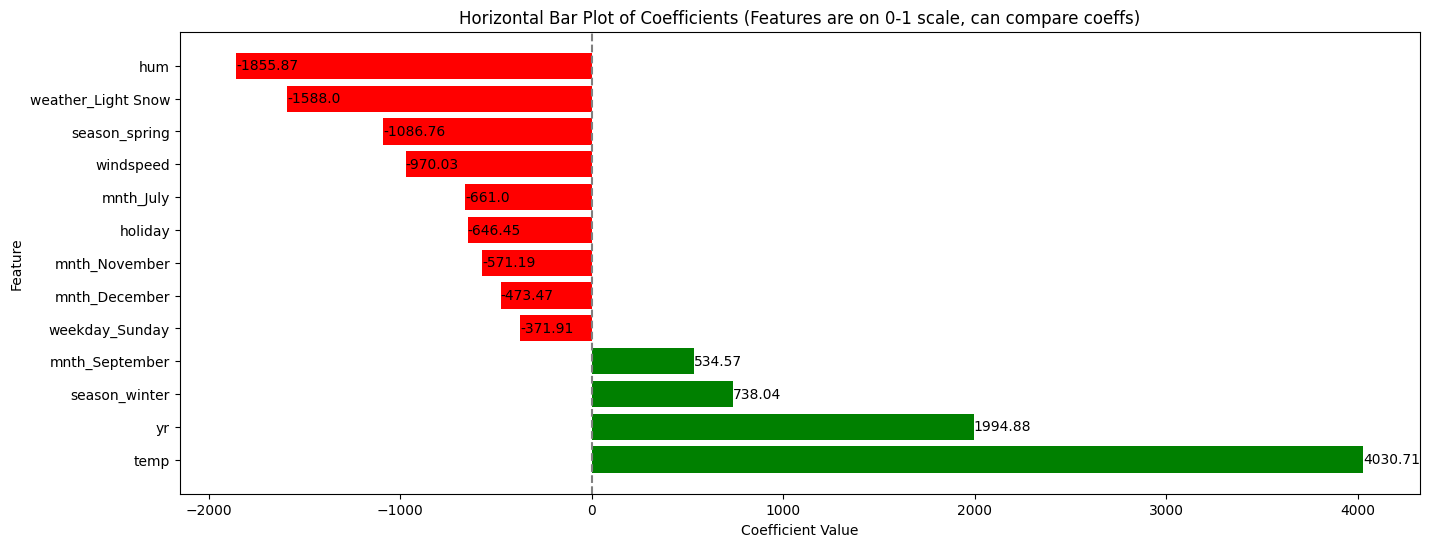

In [385]:
# Create plot for coefficients

plt.figure(figsize=(16, 6))
for index, row in df_coef.iterrows():
  if row['coef_'] >= 0:
    color = 'green' # Positive coefficients highlighted as green
  else:
    color = 'red' # Negative coefficients highlighted as red
  plt.barh(row['feature_names_in_'], row['coef_'], color=color)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Horizontal Bar Plot of Coefficients (Features are on 0-1 scale, can compare coeffs)')
plt.axvline(x=0, color='gray', linestyle='--')  # Add a vertical line at x=0

# Add label values to the bars
for index, row in df_coef.iterrows():
  plt.text(row['coef_'], row['feature_names_in_'], str(round(row['coef_'], 2)), va='center')

plt.show()

We will now Reverse scale coefficients to make the varaibles interpretable in theor original scale.

**Note this data should not be used to compare two variables**

Since we have used min-max scaling, the coefficient needs to be reverse scaled to reflect the original scale of the temperature and windspeed data. This is done by multiplying the coefficient by the scale factor .

In [386]:
# reverse scale coefficients

df_coef_reverse_scaled = df_coef.copy()

# reverse scale coefficient for temp
df_coef_reverse_scaled.loc[df_coef_reverse_scaled['feature_names_in_'] == 'temp', 'coef_'] = df_coef_reverse_scaled[df_coef_reverse_scaled['feature_names_in_'] == 'temp']['coef_'].values[0] * df_scaler[df_scaler['feature_names_in_'] == 'temp']['scale_'].values[0]

# reverse scale coefficient for windspeed
df_coef_reverse_scaled.loc[df_coef_reverse_scaled['feature_names_in_'] == 'windspeed', 'coef_'] = df_coef_reverse_scaled[df_coef_reverse_scaled['feature_names_in_'] == 'windspeed']['coef_'].values[0] * df_scaler[df_scaler['feature_names_in_'] == 'windspeed']['scale_'].values[0]

# reverse scale coefficient for hum
df_coef_reverse_scaled.loc[df_coef_reverse_scaled['feature_names_in_'] == 'hum', 'coef_'] = df_coef_reverse_scaled[df_coef_reverse_scaled['feature_names_in_'] == 'hum']['coef_'].values[0] * df_scaler[df_scaler['feature_names_in_'] == 'hum']['scale_'].values[0]

df_coef_reverse_scaled

# All features are in their ORIGINAL SCALE, do not compare coeffs

,feature_names_in_,coef_
0,temp,122.499018
1,yr,1994.884044
7,season_winter,738.040142
11,mnth_September,534.569968
12,weekday_Sunday,-371.910736
8,mnth_December,-473.472832
10,mnth_November,-571.190693
4,holiday,-646.450330
9,mnth_July,-661.000747
3,windspeed,-40.701283


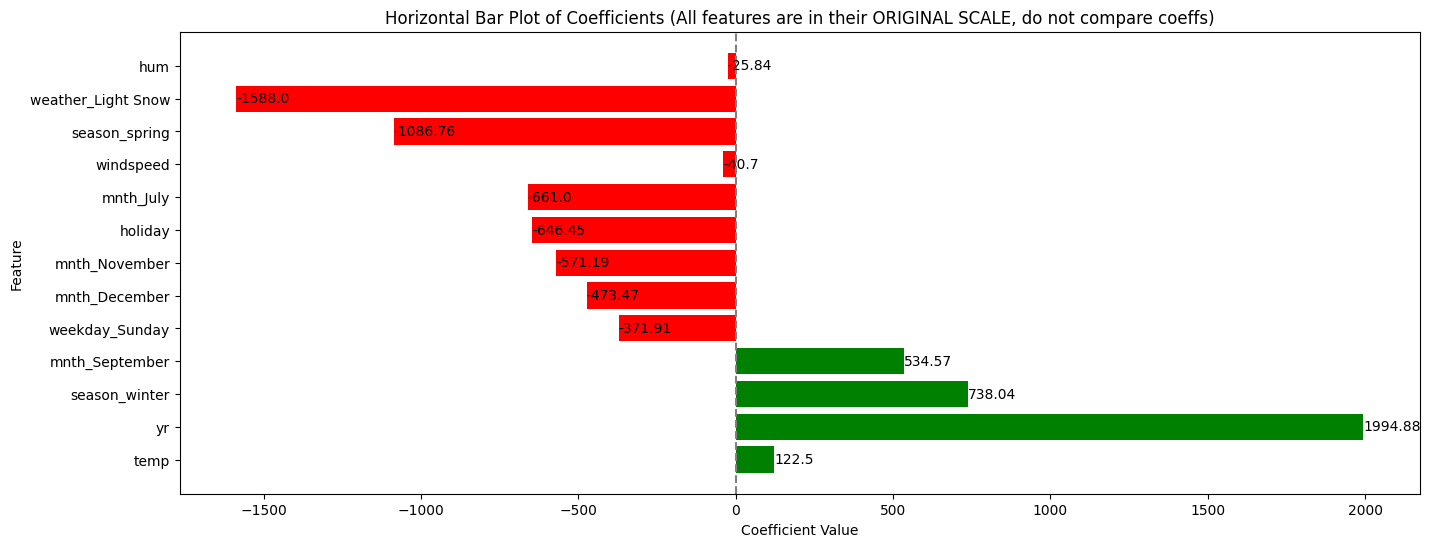

In [387]:
# Create plot for reverse scale coefficient
# using reverse scaled coefficients in df_coef_reverse_scaled

plt.figure(figsize=(16, 6))
for index, row in df_coef_reverse_scaled.iterrows():
  if row['coef_'] >= 0:
    color = 'green' # Positive coefficients highlighted as green
  else:
    color = 'red' # Negative coefficients highlighted as red
  plt.barh(row['feature_names_in_'], row['coef_'], color=color)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Horizontal Bar Plot of Coefficients (All features are in their ORIGINAL SCALE, do not compare coeffs)')
plt.axvline(x=0, color='gray', linestyle='--')  # Add a vertical line at x=0

# Add label values to the bars
for index, row in df_coef_reverse_scaled.iterrows():
  plt.text(row['coef_'], row['feature_names_in_'], str(round(row['coef_'], 2)), va='center')

plt.show()

# Validate model interpretation

Let us check the interpretation. We will choose two variables and perfrom a sanity test to verify the model interpretations.



> A sanity check or sanity test is a basic test to quickly evaluate whether a claim or the result of a calculation can possibly be true. This test is not designed to be accurate to the last digit, the idea is to validate the general trend and direction.



Plotting yr vs cnt. The coefficient for yr is about 1994.88

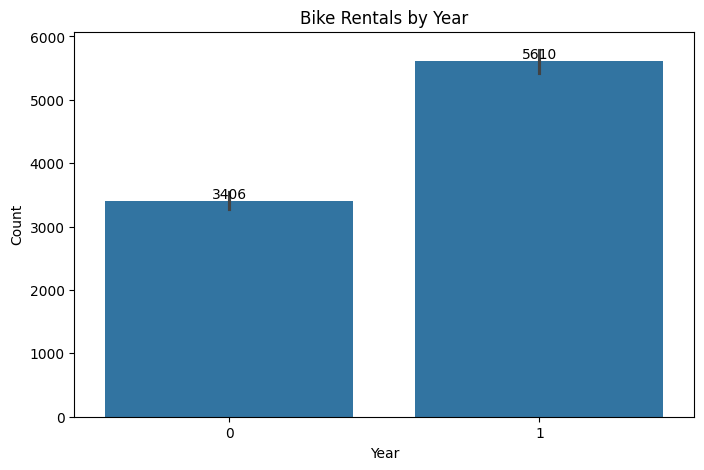

In [388]:
plt.figure(figsize=(8, 5))
sns.barplot(x='yr', y='cnt', data=df_original)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bike Rentals by Year')

# Add labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

The difference above is 2,204, which is very close what is represented in the model 1994.88 (original scale coefficient of `yr`) increase year to year.

Now let us check if there is a decrease in cnt when it snows.

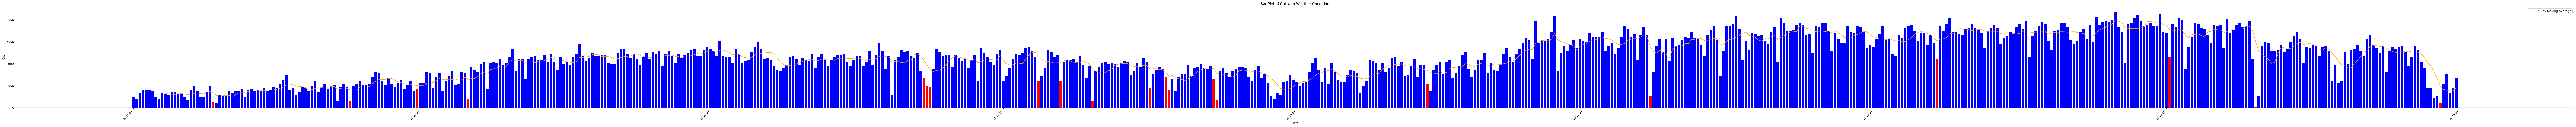

In [389]:
# Create a bar plot
plt.figure(figsize=(120, 6))
plt.bar(df_original['dteday'], df_original['cnt'], color=['red' if x == 3 else 'blue' for x in df_original['weathersit']])
plt.xlabel('Date')
plt.ylabel('Cnt')
plt.title('Bar Plot of Cnt with Weather Condition')
plt.xticks(rotation=45, ha='right')

# Calculate and plot the moving average
rolling_mean = df_original['cnt'].rolling(window=7).mean()  # Adjust window as needed
plt.plot(df_original['dteday'], rolling_mean, color='orange', label='7-Day Moving Average')
plt.legend()

plt.tight_layout()
plt.show()

*Click on graph above to view in expanded view.*

We can confirm that on days when it snows there is a decrease in cnt.